In [61]:
##importing important 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

##### Merging 12 months data into single csv file

In [2]:
df = pd.read_csv("./monthly data/Sales_April_2019.csv")

files = [file for file in os.listdir('./monthly data')]

combined_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./monthly data/" + file)
    combined_data = pd.concat([combined_data, df])
    
combined_data.to_csv("D:\Projects\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\combined_data.csv", index = False)

combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
combined_data.shape

(186850, 6)

In [4]:
data = pd.read_csv("D:\Projects\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\combined_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### Data Cleaning

In [6]:
data =data.dropna().reset_index(drop = True)

In [7]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
data.rename(columns = {'Order ID': 'order_id', "Quantity Ordered": "qty_order",'Price Each':'price_each','Order Date':"order_date",'Purchase Address':"Purchase_address"}, inplace = True)

In [9]:
data.head(2)

,order_id,Product,qty_order,price_each,order_date,Purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [10]:
#### Changing Data Type

data['qty_order'] = pd.to_numeric(data['qty_order'], errors='coerce')
data['price_each'] = pd.to_numeric(data['price_each'], errors='coerce')
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   qty_order         185950 non-null  float64       
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   Purchase_address  186305 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 8.5+ MB


In [12]:
# Dropping rows where order_date is  missing
data.dropna(subset=['order_date'], inplace=True)
data.shape

(185950, 6)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   qty_order         185950 non-null  float64       
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   Purchase_address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


### Answering some probable business questions

#### 1. Which was the best month for sale. And How much money was earned that month?

In [14]:
### Creating Month Column
data['Month'] = data["order_date"].dt.strftime("%b")
data.head(2)

,order_id,Product,qty_order,price_each,order_date,Purchase_address,Month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr


In [15]:
#### Deriving Sales Column
data['Sales'] = data['qty_order']* data['price_each']
data

,order_id,Product,qty_order,price_each,order_date,Purchase_address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99
...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.97
186301,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.00
186302,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,700.00
186303,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,379.99


In [16]:
monthwise_sale = data.groupby('Month')['Sales'].sum()
monthly_sale = monthwise_sale.idxmax()
max_sale = monthwise_sale.max()

print("month with max sale : ", monthly_sale)
print("Total Sales :", max_sale)

month with max sale :  Dec
Total Sales : 4613443.34


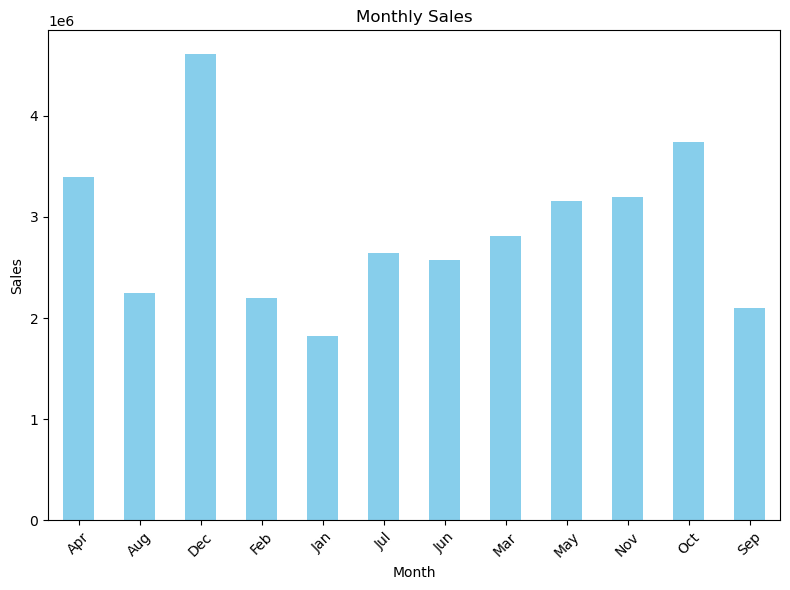

In [17]:
plt.figure(figsize=(8, 6))
monthwise_sale.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()

#### 2. Which City Sold the Maximum Product?

In [18]:
### Adding a City Column
data['City'] = data['Purchase_address'].apply(lambda x: x.split(',')[1])
data['State'] = data['Purchase_address'].apply(lambda x: x.split(', ')[2])
data['State'] = data ['State'].apply(lambda x: x.split(' ')[0])
data.head(3)

,order_id,Product,qty_order,price_each,order_date,Purchase_address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,MA
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,CA


In [19]:
Citywise_prod = data.groupby('City')['Product'].count()
Max_prod_sold = Citywise_prod.idxmax()
Max_prod = Citywise_prod.max()

print("City with Max Product Sold :", Max_prod_sold )
print("No. of Product Sold :", Max_prod )

City with Max Product Sold :  San Francisco
No. of Product Sold : 44732


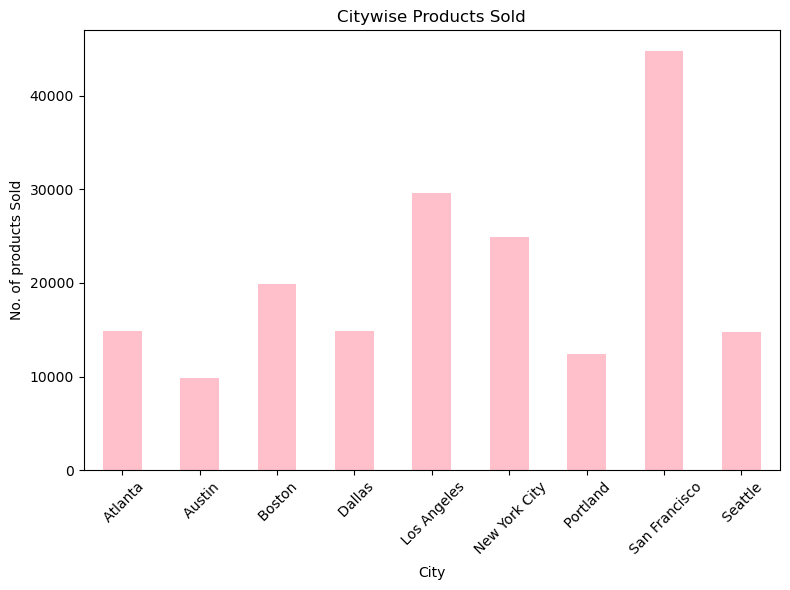

In [20]:
plt.figure(figsize=(8, 6))
Citywise_prod.plot(kind='bar', color = 'pink')
plt.title('Citywise Products Sold')
plt.xlabel('City')
plt.ylabel('No. of products Sold')
plt.xticks(rotation=45)
plt.tight_layout()

 #### 3. What time should we display advertisement to  maximize the likelihood of customer's buying product?

In [21]:
data['hour'] = data['order_date'].dt.hour
data.head(3)

,order_id,Product,qty_order,price_each,order_date,Purchase_address,Month,Sales,City,State,hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,TX,8
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,MA,22
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,CA,14


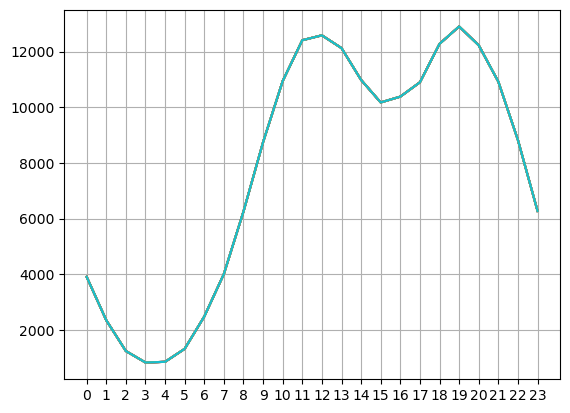

In [22]:
hours = [hour for hour, df in data.groupby('hour')]
plt.plot(hours, data.groupby(['hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

## According to the given data the best time to advertise is around 11-12 in morning or 7-8 in the evening.

#### 4. What products are most often sold together

In [26]:
df = data[data["order_id"].duplicated(keep = False)]
df['grouped'] = df.groupby('order_id')['Product'].transform(lambda x: ','.join(x))
df = df[['order_id', 'grouped']].drop_duplicates()
df.head()

C:\Users\swati\AppData\Local\Temp\ipykernel_6592\2117003940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('order_id')['Product'].transform(lambda x: ','.join(x))


,order_id,grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [34]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))
    
for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


#### Whict product is sold the most? Why do you think it's sold the most?

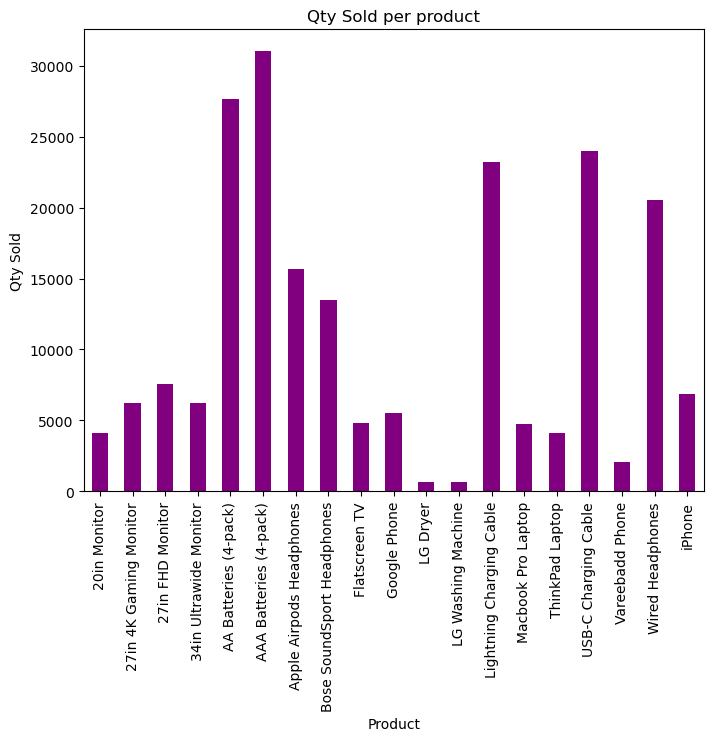

In [49]:
sale_per_product = data.groupby('Product')['qty_order'].sum()
plt.figure(figsize=(8, 6))
sale_per_product.plot(kind='bar', color = 'purple')
plt.title('Qty Sold per product')
plt.xlabel('Product')
plt.ylabel('Qty Sold')
plt.show()

##### As per our analysis AAA Batteries (4-pack) is the most sold electronic item. It may be due to the lower prices. To find out whether our assumption is true or not. Let's do some hypothesis testing.

##### Null Hypotheses : There is no significant correlation b/w the quantity of products sold and their prices. In other word correlation coefficient is zero

##### Alternate Hypotheses : There exist a negative correlation b/w quantity of products sold and their price. i.e.,  correlation coefficient is negative.


In [55]:
data.head(3)

,order_id,Product,qty_order,price_each,order_date,Purchase_address,Month,Sales,City,State,hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,TX,8
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,MA,22
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,CA,14


Correlation coefficient: -0.6014430559934549
There is a significant correlation between mean price and total quantity ordered.


Text(0.5, 1.0, 'Correlation between Price and Total Quantity Ordered')

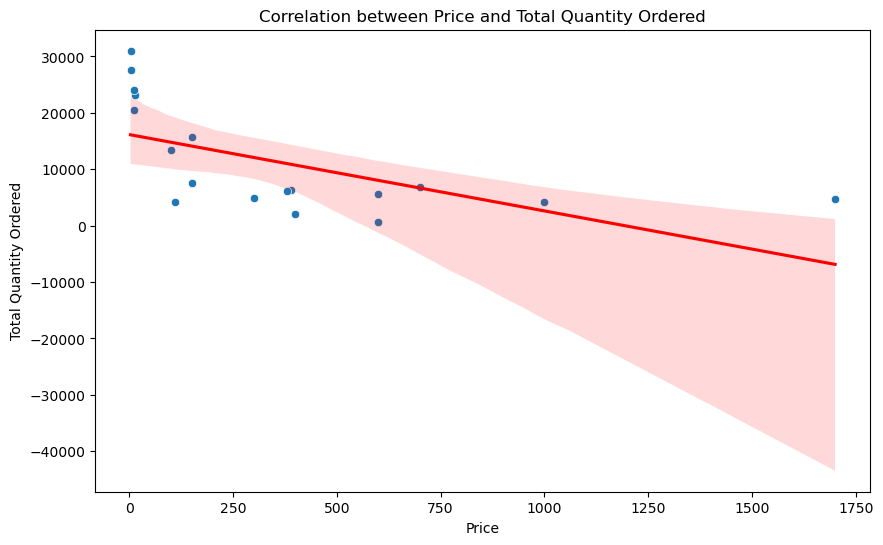

In [65]:
product_stats = data.groupby('Product').agg({'price_each':"mean", "qty_order":"sum"}).reset_index()

#### Calculation correlation coefficient and associated p-value

correlation_coefficient, p_value = stats.pearsonr(product_stats['price_each'], product_stats['qty_order'])

alpha = 0.05

if p_value < alpha:
    print(f"Correlation coefficient: {correlation_coefficient}")
    print("There is a significant correlation between mean price and total quantity ordered.")
else:
    print("There is no significant correlation between mean price and total quantity ordered.")
    
    
#### Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_each', y='qty_order', data=product_stats)
sns.regplot(x='price_each', y='qty_order', data=product_stats, scatter=False, color='red', label=f'Correlation: {correlation_coefficient:.2f}')
plt.xlabel('Price')
plt.ylabel('Total Quantity Ordered')
plt.title('Correlation between Price and Total Quantity Ordered')

###### Therefore we reject he null hypothesis and can conclude there exist a negative correlation b/w quantity ordered and their prices